<a href="https://colab.research.google.com/github/hida0/ESAA-2022-2/blob/HW/Week06_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 캐글 필사
[Customers clustering: K-Means, DBSCAN and AP | Kaggle](https://www.kaggle.com/code/datark1/customers-clustering-k-means-dbscan-and-ap/notebook)

### 1. Import Libraries and Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [ ]:
mall = pd.read_csv('/content/drive/MyDrive/ESAA/data/Mall_Customers.csv')

- 5개의 칼럼이 존재한다.
 - `CustomerID`: numerical, integer
 - `Gender`: categorical, binary
 - `Age`: numerical, integer
 - `Annual Income (k$)`: numerical, integer
 - `Spending Score (1-100)`: numerical, integer
- 결측치는 존재하지 않는다.

In [ ]:
print(mall.shape)
mall.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 2. EDA
#### 2-1. Distributions


**1) Gender**
- 평균 나이는 
- 여자가 112명, 남자가 87명이다. 여자가 전체 고객의 56%를 차지한다.

In [ ]:
males_age = mall[mall['Gender']=='Male']['Age']
females_age = mall[mall['Gender']=='Female']['Age']

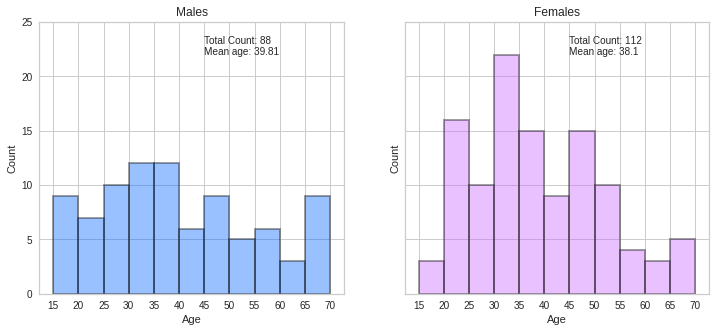

In [ ]:
age_bins = range(15, 75, 5)

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# male histogram
sns.distplot(males_age, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(age_bins)
ax1.set_ylim(top=25)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(45, 23, "Total Count: {}".format(males_age.count()))
ax1.text(45, 22, "Mean age: {}".format(round(males_age.mean(), 2)))

# female histogram
sns.distplot(females_age, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_ylim(top=25)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(45, 23, "Total Count: {}".format(females_age.count()))
ax2.text(45, 22, "Mean age: {}".format(round(females_age.mean(), 2)))
plt.show()

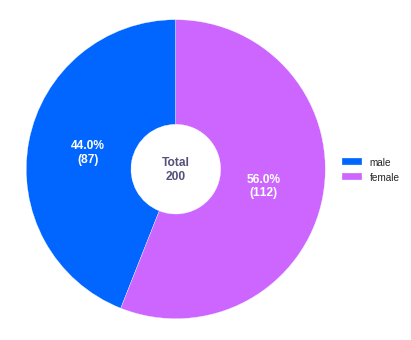

In [ ]:
def labeler(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

sizes = [males_age.count(), females_age.count()]
fig0, ax1 = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax1.pie(sizes, autopct=lambda pct: labeler(pct, sizes),
                                   radius=1, colors=['#0066ff', '#cc66ff'],
                                   startangle=90, textprops=dict(color='w'), wedgeprops=dict(width=0.7, edgecolor='w'))

ax1.legend(wedges, ['male', 'female'], loc='center right', bbox_to_anchor=(0.7, 0, 0.5, 1))
plt.text(0, 0, 'Total\n{}'.format(mall['Age'].count()), weight='bold', size=12, color='#52527a', ha='center', va='center')
plt.setp(autotexts, size=12, weight='bold')
ax1.axis('equal')
plt.show()

**2) Gender & Anuual Income**
- 남자의 평균 연간 수입이 여자의 평균 연간 수입보다 더 높다.
- 남자의 연간 수입 중간값이 여자의 연간 수입 중간값보다 더 높다.
- 표준편차는 남자와 여자 두 그룹에서 비슷하다.
- 남자의 연간 수입에서 이상치가 존재한다.

In [ ]:
males_income = mall[mall['Gender']=='Male']['Annual Income (k$)']
females_income = mall[mall['Gender']=='Female']['Annual Income (k$)']

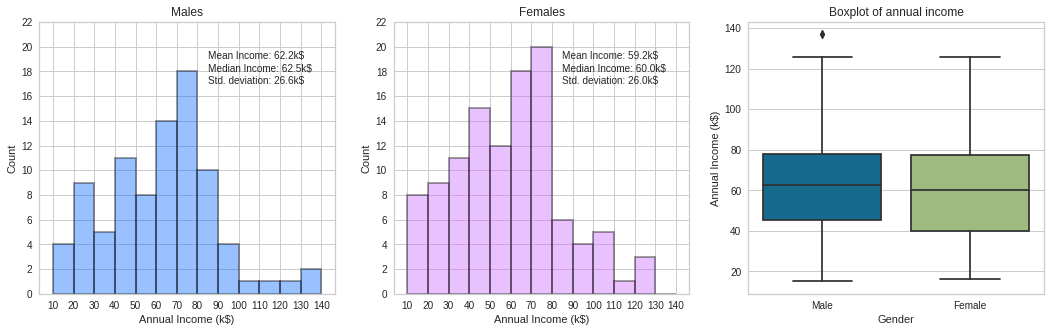

In [ ]:
my_bins = range(10, 150, 10)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# male histogram
sns.distplot(males_income, bins=my_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(my_bins)
ax1.set_yticks(range(0, 24, 2))
ax1.set_ylim(0, 22)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(85, 19, "Mean Income: {:.1f}k$".format(round(males_income.mean(), 2)))
ax1.text(85, 18, "Median Income: {:.1f}k$".format(males_income.median()))
ax1.text(85, 17, "Std. deviation: {:.1f}k$".format(round(males_income.std(), 2)))

# female histogram
sns.distplot(females_income, bins=my_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(my_bins)
ax2.set_yticks(range(0, 24, 2))
ax2.set_ylim(0, 22)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(85, 19, "Mean Income: {:.1f}k$".format(round(females_income.mean(), 2)))
ax2.text(85, 18, "Median Income: {:.1f}k$".format(females_income.median()))
ax2.text(85, 17, "Std. deviation: {:.1f}k$".format(round(females_income.std(), 2)))

# boxplot
sns.boxplot(x='Gender', y='Annual Income (k$)', data=mall, ax=ax3)
ax3.set_title("Boxplot of annual income")
plt.show()

**3) Gender & Spending Score**
- 평균 소비 점수는 여자가 남자보다 더 높다.

In [ ]:
males_spending= mall[mall['Gender']=='Male']['Spending Score (1-100)']
females_spending = mall[mall['Gender']=='Female']['Spending Score (1-100)']

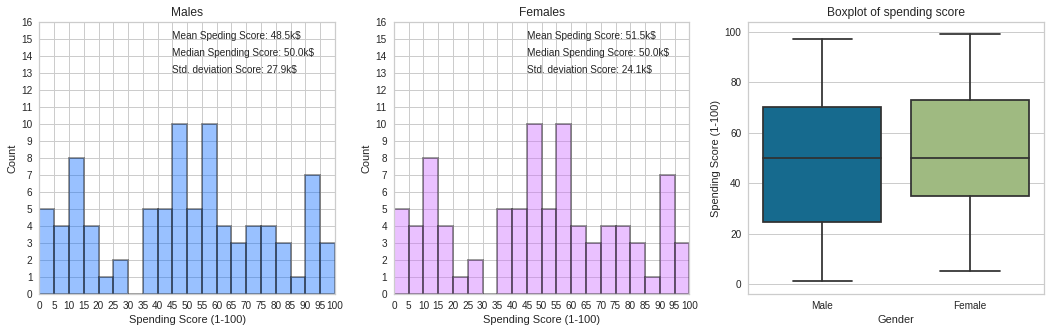

In [ ]:
spending_bins = range(0, 105, 5)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# male histogram
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor='k', linewidth=2))
ax1.set_xticks(spending_bins)
ax1.set_xlim(0, 100)
ax1.set_yticks(range(0, 17, 1))
ax1.set_ylim(0, 16)
ax1.set_title("Males")
ax1.set_ylabel("Count")
ax1.text(45, 15, "Mean Speding Score: {:.1f}k$".format(round(males_spending.mean(), 2)))
ax1.text(45, 14, "Median Spending Score: {:.1f}k$".format(males_spending.median()))
ax1.text(45, 13, "Std. deviation Score: {:.1f}k$".format(round(males_spending.std(), 2)))

# female histogram
sns.distplot(males_spending, bins=spending_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor='k', linewidth=2))
ax2.set_xticks(spending_bins)
ax2.set_xlim(0, 100)
ax2.set_yticks(range(0, 17, 1))
ax2.set_ylim(0, 16)
ax2.set_title("Females")
ax2.set_ylabel("Count")
ax2.text(45, 15, "Mean Speding Score: {:.1f}k$".format(round(females_spending.mean(), 2)))
ax2.text(45, 14, "Median Spending Score: {:.1f}k$".format(females_spending.median()))
ax2.text(45, 13, "Std. deviation Score: {:.1f}k$".format(round(females_spending.std(), 2)))

# boxplot
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=mall, ax=ax3)
ax3.set_title("Boxplot of spending score")
plt.show()

**4) Gender & Age & Annual Income**
- 25에서 45세 사이에 가장 부유한 고객들이 많다.
- 25-30세 나이대에는 남자의 연간 수입 중간값이 더 높고, 50-55세 나이대에는 여자의 연간 수입 중간값이 더 높다.

In [ ]:
age_bins = range(15, 75, 5)

medians_by_age_group = mall.groupby(['Gender', pd.cut(mall['Age'], age_bins)]).median()
medians_by_age_group.index = medians_by_age_group.index.set_names(['Gender', 'Age_group'])
medians_by_age_group.reset_index(inplace=True)

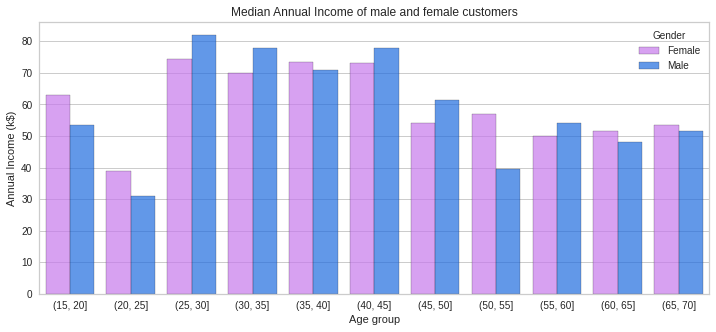

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Age_group', y='Annual Income (k$)', hue='Gender', data=medians_by_age_group, palette=['#cc66ff', '#0066ff'], alpha=0.7, edgecolor='k', ax=ax)
ax.set_title("Median Annual Income of male and female customers")
ax.set_xlabel("Age group")
plt.show()

### 2. EDA
#### 2-2. Correlations
- 수치형 변수들 간의 상관관계를 조사한다.

**1) Age & Spending Score**

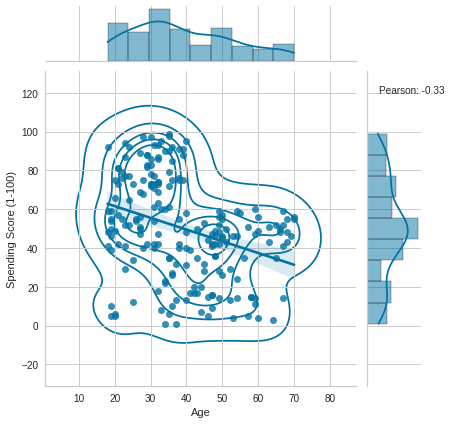

In [ ]:
from scipy.stats import pearsonr

corr, _ = pearsonr(mall['Age'], mall['Spending Score (1-100)'])

jp = (sns.jointplot('Age', 'Spending Score (1-100)', data=mall, kind='reg')).plot_joint(sns.kdeplot, zorder=0, n_levels=6)

plt.text(10, 120, 'Pearson: {:.2f}'.format(corr))
plt.show()

**2) Gender & Age & Annual Income**
- 성별에 따른 나이와 연간 수입의 상관계수가 무시할 수 있을만큼 매우 작다.

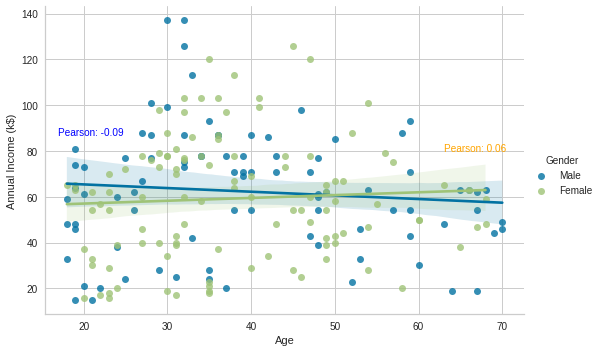

In [ ]:
corr1, _ = pearsonr(males_age.values, males_income.values)
corr2, _ = pearsonr(females_age.values, females_income.values)

sns.lmplot('Age', 'Annual Income (k$)', hue='Gender', data=mall, aspect=1.5)

plt.text(17, 87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(63, 80, 'Pearson: {:.2f}'.format(corr2), color='orange')
plt.show()

**2) Gender & Age & Spending Score**
- 성별에 따른 나이와 소비 점수 사이에 약한 부정적인 상관관계가 있다.

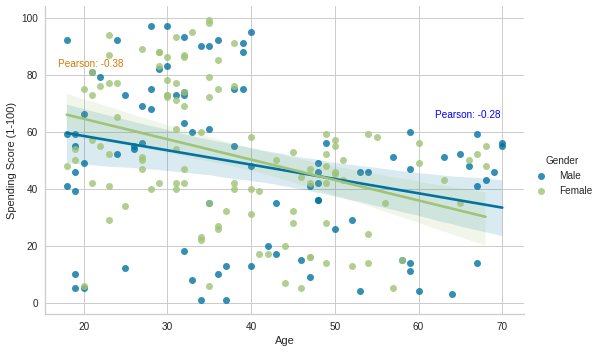

In [ ]:
corr1, _ = pearsonr(males_age.values, males_spending.values)
corr2, _ = pearsonr(females_age.values, females_spending.values)

sns.lmplot('Age', 'Spending Score (1-100)', hue='Gender', data=mall, aspect=1.5)

plt.text(62, 65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(17, 83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')
plt.show()

**3) Gender & Annual Income & Spending Score**
- 성별에 따른 연간 수입과 소비 점수의 상관계수가 무시할 수 있을만큼 매우 작다.

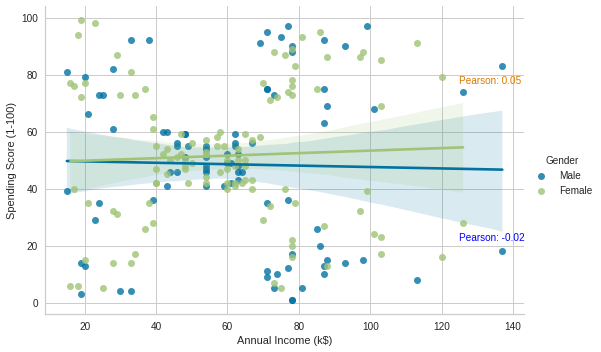

In [ ]:
corr1, _ = pearsonr(males_income.values, males_spending.values)
corr2, _ = pearsonr(females_income.values, females_spending.values)

sns.lmplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Gender', data=mall, aspect=1.5)

plt.text(125, 22, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(125, 77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')
plt.show()

### 3. Clustering


#### **3-1. K-Means**
1) Description

There are 3 main steps in K-Means algorithm.
1. Split samples into initial groups by using seed points. The nearest samples to these seed point will create initial clusters.
2. Calculate samples distances to groups' central points (centroids) and assign the nearest samples to their cluster. 
3. The third step is to calculate newly created (updated) cluster centroids.

Then repeat steps 2 and 3 until the algorithm converges.

In general, a user of the K-Means algorithm is required to define three main parameters:
1. **Initialisation criteria**
2. **Number of clusters**
3. **A distance metric**

#### **3-1. K-Means**
2) Use case - **Customers Segmentation**

For clustering only numeric columns are used. The binary variable `Gender` will not be used here.

In order to find an appropriate number of clusters, the elbow method will be used. In this method for this case, the inertia for a number of clusters between 2 and 10 will be calculated. The rule is to choose the number of clusters where you see a kink or "an elbow" in the graph.

The graph above shows the reduction of a **distortion score** as the number of clusters increases. But, there is no clear "elbow" visible. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

In [ ]:
from sklearn.cluster import KMeans
X_numerics = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

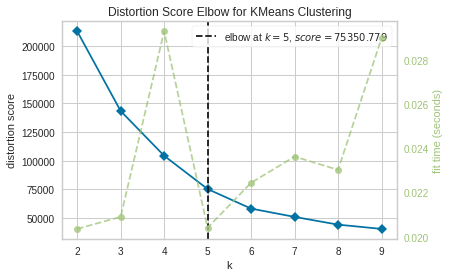

In [ ]:
model = KMeans(random_state=1)

from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

#### **3-1. K-Means**
2) Use case - **Customers Segmentation**

Another way to choose the best number of clusters is to plot the **silhouette score** in a function of number of clusters. 

Silhuette score method indicates the best options would be 5 or 6 clusters. Compare each case.

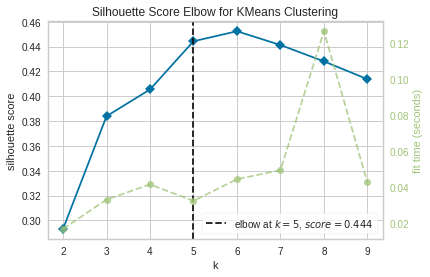

In [ ]:
model = KMeans(random_state=1)

visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

#### **3-1. K-Means**
2) Use case - **Customers Segmentation**
> **5 Clusters**

In [ ]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics)
KM_5_clusters.cluster_centers_
# Age, Annual Income, Spending Score 순서

array([[40.66666667, 87.75      , 17.58333333],
       [43.08860759, 55.29113924, 49.56962025],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [25.52173913, 26.30434783, 78.56521739]])

In [ ]:
KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:, 'Cluster'] = KM_5_clusters.labels_
KM5_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,2
1,21,15,81,4
2,20,16,6,2
3,23,16,77,4
4,31,17,40,2
...,...,...,...,...
195,35,120,79,3
196,45,126,28,0
197,32,126,74,3
198,32,137,18,0


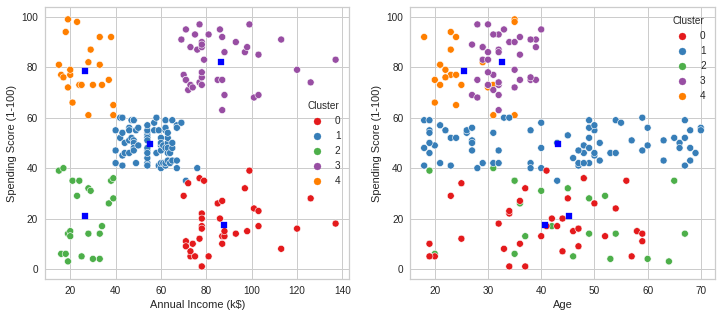

In [ ]:
fig11, (axes) = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Cluster', data=KM5_clustered, ax=axes[0], palette='Set1', legend='full')
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Cluster', data=KM5_clustered, ax=axes[1], palette='Set1', legend='full')

axes[0].scatter(x=KM_5_clusters.cluster_centers_[:, 1], y=KM_5_clusters.cluster_centers_[:, 2], marker='s', s=40, c='blue')
axes[1].scatter(x=KM_5_clusters.cluster_centers_[:, 0], y=KM_5_clusters.cluster_centers_[:, 2], marker='s', s=40, c='blue')
plt.show()

#### **3-1. K-Means**
2) Use case - **Customers Segmentation**
> **5 Clusters**

K-Means algorithm generated the following 5 clusters:
- clients with low annual income and low spending score (주황색)
- clients with low annual income and high spending score (파란색)
- clients with medium annual income and medium spending score (보라색)
- clients with high annual income and low spending score (빨강색)
- clients with high annual income and high spending score (연두색)

There are no distinct groups is terms of customers age.

In [ ]:
KM5_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM5_clust_sizes.columns = ['KM_size']
KM5_clust_sizes

,KM_size
Cluster,
0,36
1,79
2,23
3,39
4,23


#### **3-1. K-Means**
2) Use case - **Customers Segmentation**
> **5 Clusters**

The biggest cluster is a cluster number 2 with 79 observations. There are two the smallest ones each containing 22, 23 observations. 

Draw a **3D projection** of 5 generated clusters. And draw a Plotly version.


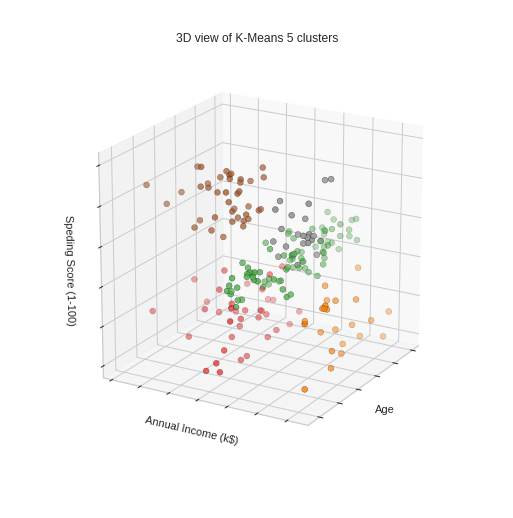

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, 0.99, 1], elev=20, azim=210)
ax.scatter(xs=KM5_clustered['Age'], ys=KM5_clustered['Annual Income (k$)'], zs=KM5_clustered['Spending Score (1-100)'],
                    c=KM5_clustered['Cluster'], s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Speding Score (1-100)")
ax.set_title("3D view of K-Means 5 clusters")
ax.dist = 12
plt.show()

In [ ]:
import plotly as py
import plotly.graph_objs as go

def tracer(db, n, name):
    '''This function returns trace object for Plotly'''
    return go.Scatter3d(x=db[db['Cluster']==n]['Age'], y=db[db['Cluster']==n]['Spending Score (1-100)'], z=db[db['Cluster']==n]['Annual Income (k$)'],
                        mode='markers', name=name, marker=dict(size=5))
    
trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

In [ ]:
layout = go.Layout(
    title="Clusters by K-Means",
    scene=dict(
                 xaxis=dict(title="Age"),
                 yaxis=dict(title="Spending Score"),
                 zaxis=dict(title="Annual Income")
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

#### **3-1. K-Means**
2) Use case - **Customers Segmentation**
> **5 Clusters**

To check the quality of each cluster we can examine **the Silhouette plot**.

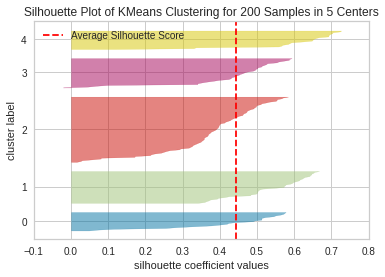

In [ ]:
model = KMeans(n_clusters=5, random_state=0)

from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

#### **3-1. K-Means**
2) Use case - **Customers Segmentation**
> **6 Clusters**

In [ ]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics)
KM_6_clusters.cluster_centers_
# Age, Annual Income, Spending Score 순서

array([[32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952],
       [56.15555556, 53.37777778, 49.08888889],
       [25.27272727, 25.72727273, 79.36363636],
       [41.68571429, 88.22857143, 17.28571429],
       [27.        , 56.65789474, 49.13157895]])

In [ ]:
KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:, 'Cluster'] = KM_6_clusters.labels_
KM6_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,1
1,21,15,81,3
2,20,16,6,1
3,23,16,77,3
4,31,17,40,1
...,...,...,...,...
195,35,120,79,0
196,45,126,28,4
197,32,126,74,0
198,32,137,18,4


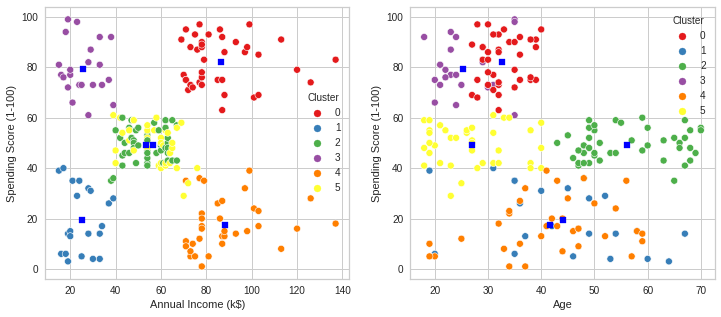

In [ ]:
fig12, (axes) = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Cluster', data=KM6_clustered, ax=axes[0], palette='Set1', legend='full')
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Cluster', data=KM6_clustered, ax=axes[1], palette='Set1', legend='full')

axes[0].scatter(x=KM_6_clusters.cluster_centers_[:, 1], y=KM_6_clusters.cluster_centers_[:, 2], marker='s', s=40, c='blue')
axes[1].scatter(x=KM_6_clusters.cluster_centers_[:, 0], y=KM_6_clusters.cluster_centers_[:, 2], marker='s', s=40, c='blue')
plt.show()

#### **3-1. K-Means**
2) Use case - **Customers Segmentation**
> **6 Clusters**

K-Means algorithm generated the following 6 clusters:
- clients with low annual income and low spending score (주황색)
- clients with low annual income and high spending score (보라색)
- younger clients with medium annual income and medium spending score (노란색)
- older clients with medium annual income and medium spending score (빨강색)
- clients with high annual income and low spending score (연두색)
- clients with high annual income and high spending score (파랑색)


In [ ]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ['KM_size']
KM6_clust_sizes

,KM_size
Cluster,
0,39
1,21
2,45
3,22
4,35
5,38


#### **3-1. K-Means**
2) Use case - **Customers Segmentation**
> **6 Clusters**

Draw a **3D projection** of 6 generated clusters. And draw a Plotly version.


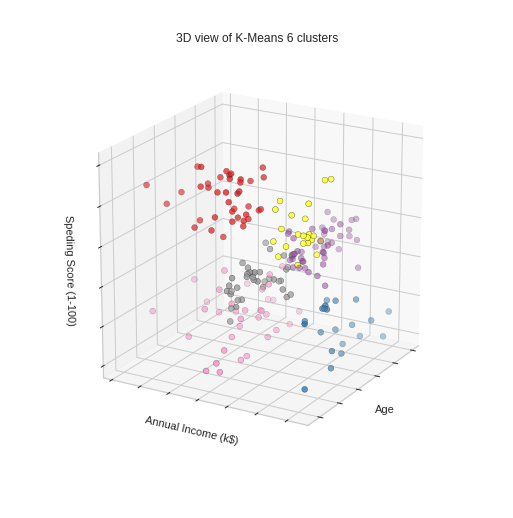

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig, rect=[0, 0, 0.99, 1], elev=20, azim=210)
ax.scatter(xs=KM6_clustered['Age'], ys=KM6_clustered['Annual Income (k$)'], zs=KM6_clustered['Spending Score (1-100)'],
                    c=KM6_clustered['Cluster'], s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Speding Score (1-100)")
ax.set_title("3D view of K-Means 6 clusters")
ax.dist = 12
plt.show()

In [ ]:
trace0 = tracer(KM6_clustered, 0, 'Cluster 0')
trace1 = tracer(KM6_clustered, 1, 'Cluster 1')
trace2 = tracer(KM6_clustered, 2, 'Cluster 2')
trace3 = tracer(KM6_clustered, 3, 'Cluster 3')
trace4 = tracer(KM6_clustered, 4, 'Cluster 4')
trace5 = tracer(KM6_clustered, 5, 'Cluster 5')

data = [trace0, trace1, trace2, trace3, trace4, trace5]

In [ ]:
layout = go.Layout(
    title="Clusters by K-Means",
    scene=dict(
                 xaxis=dict(title="Age"),
                 yaxis=dict(title="Spending Score"),
                 zaxis=dict(title="Annual Income")
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

#### **3-1. K-Means**
2) Use case - **Customers Segmentation**
> **6 Clusters**

To check the quality of each cluster we can examine **the Silhouette plot**.

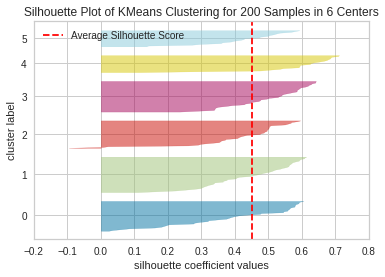

In [ ]:
model = KMeans(n_clusters=6, random_state=0)

visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

#### **3-2. DBSCAN**
1) Description

DBSCAN stands for **Density-Based Spatial Clustering of Application with Noise** and is one of clustering algorithms implemented in scikit-learn library.

As the name of paper suggests the core idea of DBSCAN is around concept of dense regions. The assumption is that **natural clusters are composed of densely located points**. This requires definition of "dense region". To do these two parameters are required for DBSCAN algorithm.
- **eps, $ε$** - distance
- **MinPts** - Minimum number of points within distance Eps

Optionally the distance metric can be specified by a user, but usually **Euclidean distance** is implemented.

Advantages of DBSCAN:
- It **finds number of clusters itselt**, based on eps and MinPts parameter.
- It is able to differentiate elongated clusters or clusters surrounded by other clusters in contrary to e.g K-Means where clusters are always convex.
- It is also able to find points not fitting into any cluster. It **detects outliers**.

The biggest drawback of DBSCAN:
- High computational expense of average O(nlog(n)) coming from a need to execute a neighborhood query for each point.
- Poorly identifies clusters with various densities.

#### **3-2. DBSCAN**
2) Use case - **Customers Segmentation**

In DBSCAN, there are two major hyperparameters:
- **`eps`**
- **`min_samples`**

It is difficult arbitrarily to say what values will work the best. Therefore create a matrix of investigated combinations.

Because DBSCAN creates clusters itself based on those two parameters, **check the number of generated clusters**.

In [ ]:
from itertools import product
eps_values = np.arange(8, 12.75, 0.25)
min_samples = np.arange(3, 10)

DBSCAN_params = list(product(eps_values, min_samples))

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

num_of_clusters = []
sil_score = []

for params in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=params[0], min_samples=params[1]).fit(X_numerics)
    num_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

In [ ]:
from collections import Counter
Counter(num_of_clusters)

Counter({17: 1,
         10: 3,
         7: 24,
         8: 11,
         6: 31,
         5: 37,
         4: 14,
         14: 1,
         11: 6,
         13: 2,
         12: 3})

#### **3-2. DBSCAN**
2) Use case - **Customers Segmentation**

A heatplot shows **how many clusters were generated by the DBSCAN algorithm** for the respective parameters combinations.

The heatplot shows, the number of clusters vary from 17 to 4. However, most of the combinations gives 4-7 clusters. **To decide which combination to choose, use a silhouette score metric** and plot it as a heatmap again.

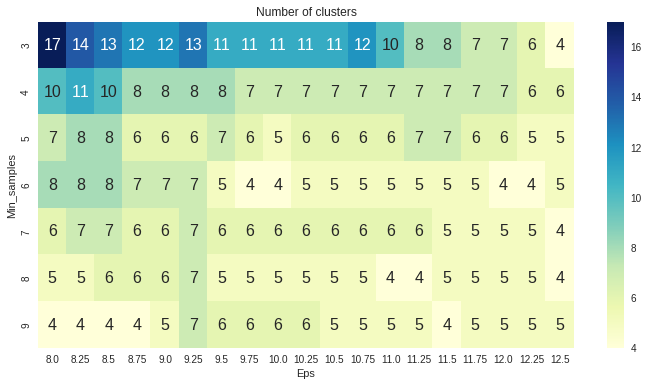

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['Num_of_clusters'] = num_of_clusters

pivot_1 = pd.pivot_table(tmp, values='Num_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size': 16}, cmap='YlGnBu', ax=ax)
ax.set_title("Number of clusters")
plt.show()

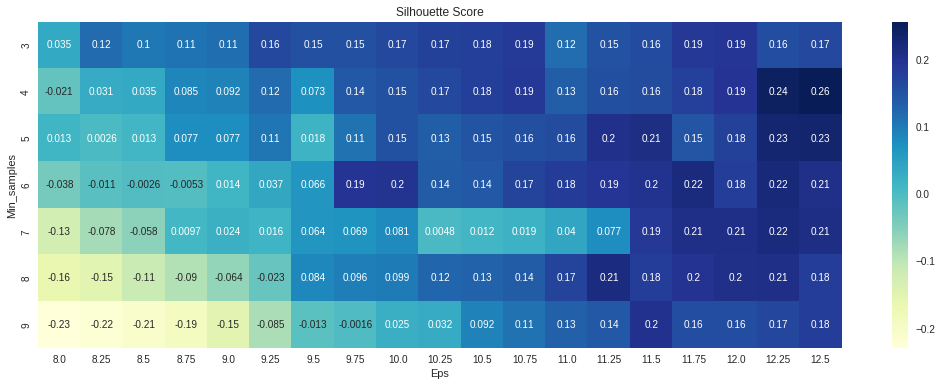

In [ ]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size': 10}, cmap='YlGnBu', ax=ax)
ax.set_title("Silhouette Score")
plt.show()

#### **3-2. DBSCAN**
2) Use case - **Customers Segmentation**

By the above heatmap, **global maximum is 0.26** for **`eps = 12.5`** and **`min_samples = 4`**.

Do DBSCAN clustering again, using this hyperparameters.

In [ ]:
DBSCAN_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:, 'Cluster'] = DBSCAN_clustering.labels_
DBSCAN_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,-1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,-1
196,45,126,28,-1
197,32,126,74,-1
198,32,137,18,-1


In [ ]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ['DBSCAN_size']
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


#### **3-2. DBSCAN**
2) Use case - **Customers Segmentation**

DBSCAN created **5 clusters** plus **outliers cluster(-1)**. Sizes of clusters 0-4 vary significantly. There are 18 outliers.

In [ ]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

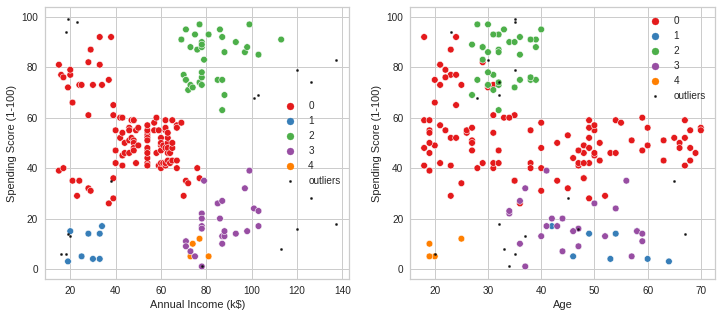

In [ ]:
fig2, (axes) = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Cluster', 
                             data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],  ax=axes[0], s=45, palette='Set1', legend='full')
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Cluster', 
                             data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], ax=axes[1], s=45, palette='Set1', legend='full')

axes[0].scatter(x=outliers['Annual Income (k$)'], y=outliers['Spending Score (1-100)'], s=5, label='outliers', c='k')
axes[1].scatter(x=outliers['Age'], y=outliers['Spending Score (1-100)'], s=5, label='outliers', c='k')
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.show()

#### **3-3. Affinity Propagation**
1) Description

Affinity Propagagtion is built around the concept of sending messages between a pair of until it converges. These messages are a way of measuring how similar these two points are to each other and can they be exemplars of each other. 

The algorithm **finds an optimum number of clusters itself**. This also **implies very high time complexity cost of the order** O($n^2T$) where $n$ is the number of samples and $T$ is the number of iterations until convergence. 

However, a big advantage of **Affinity Propagation is the lack of sensitivity to the initialization criteria**.

The user is required to specify two parameters:
- **`Preference`** which is a **negative number** and **controls how many exemplars are used**
- **`Damping factor`** which prevents numerical oscillations when updating messages

### **3-3. Affinity Propagation**
2) Use case - **Customers Segmentation**

In [ ]:
from sklearn.cluster import AffinityPropagation

num_of_clusters = []
preferences = range(-20000, -5000, 100)
af_sil_score = []

for param in preferences:
    AF = AffinityPropagation(preference=param, max_iter=200).fit(X_numerics)
    num_of_clusters.append((len(np.unique(AF.labels_))))
    if len(AF.cluster_centers_) > 1:
        af_sil_score.append(silhouette_score(X_numerics, AF.labels_))
    else :
        af_sil_score.append(-1)

In [ ]:
af_results = pd.DataFrame([preferences, num_of_clusters, af_sil_score], index=['preference', 'clusters', 'sil_score']).T
af_results.sort_values(by='sil_score', ascending=False).head()

,preference,clusters,sil_score
82,-11800.0,6.0,0.451649
27,-17300.0,6.0,0.451491
51,-14900.0,6.0,0.451491
52,-14800.0,6.0,0.451440
28,-17200.0,6.0,0.451440


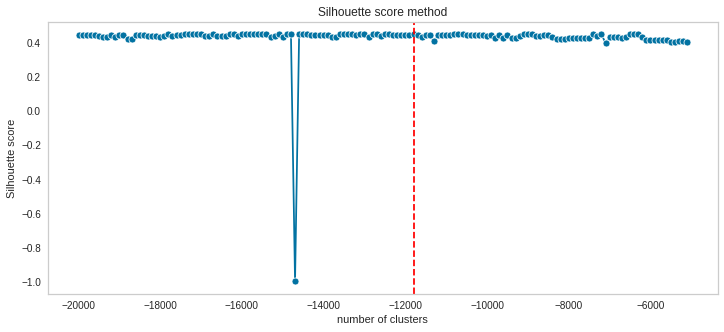

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax = sns.lineplot(preferences, af_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(-11800, ls='--', c='red')
plt.grid()
plt.show()

In [ ]:
AF = AffinityPropagation(preference=-11800).fit(X_numerics)

AF_clustered = X_numerics.copy()
AF_clustered.loc[:, 'Cluster'] = AF.labels_
AF_clustered

,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,19,15,39,1
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,1
...,...,...,...,...
195,35,120,79,5
196,45,126,28,4
197,32,126,74,5
198,32,137,18,4


In [ ]:
AF_clust_sizes = AF_clustered.groupby('Cluster').size().to_frame()
AF_clust_sizes.columns = ['AF_size']
AF_clust_sizes

,AF_size
Cluster,
0,22
1,22
2,44
3,39
4,34
5,39


### **3-3. Affinity Propagation**
2) Use case - **Customers Segmentation**

Clusters generated by the Affinity Propagation alforithm created relatively even-sized clusters similar to ones created by K-Means.

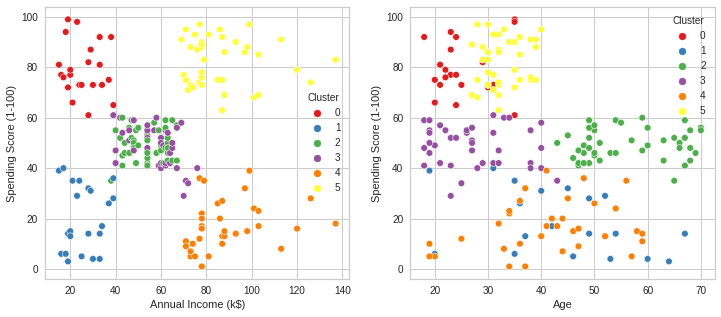

In [ ]:
fig3, (axes) = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Cluster', data=AF_clustered,  ax=axes[0], s=45, palette='Set1', legend='full')
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Cluster', data=AF_clustered, ax=axes[1], s=45, palette='Set1', legend='full')

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.show()

### 4. Comparison
- K-Means

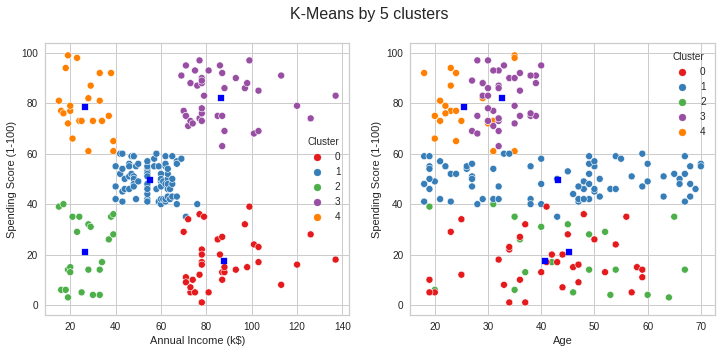

In [ ]:
fig11.suptitle("K-Means by 5 clusters", fontsize=16)
fig11

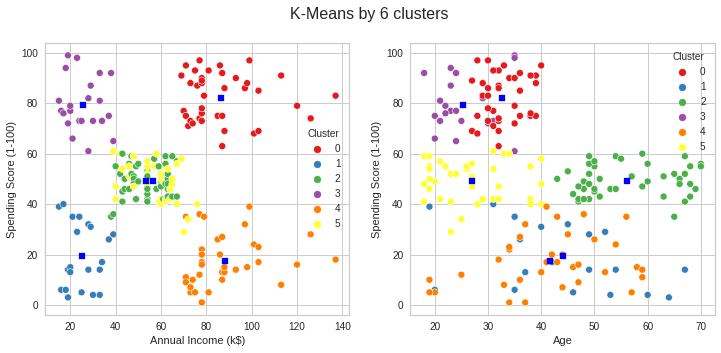

In [ ]:
fig12.suptitle("K-Means by 6 clusters", fontsize=16)
fig12

### 4. Comparison
- DBSCAN

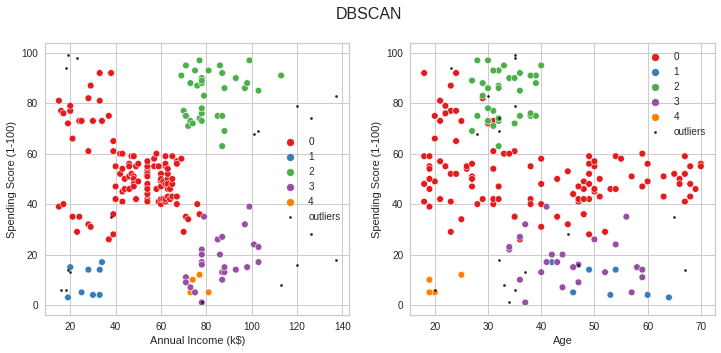

In [ ]:
fig2.suptitle("DBSCAN", fontsize=16)
fig2

### 4. Comparison
- Affinity Propagation

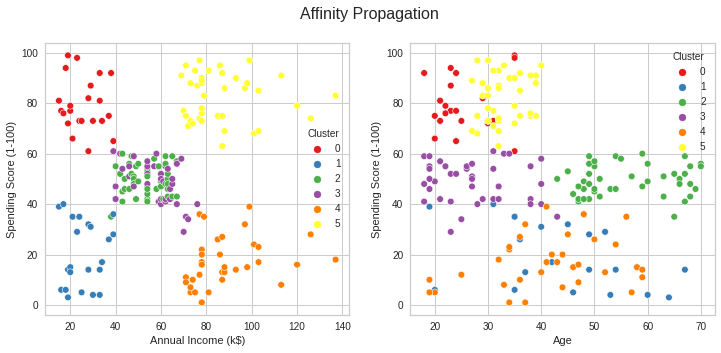

In [ ]:
fig3.suptitle("Affinity Propagation", fontsize=16)
fig3

### 4. Comparison
A table shows sizes of created clusters. 

In [ ]:
clusters = pd.concat([KM5_clust_sizes, KM6_clust_sizes, DBSCAN_clust_sizes, AF_clust_sizes], axis=1, sort=False)
clusters.columns = ['KM5_size', 'KM6_size', 'DBSCAN_size', 'AF_size']
clusters

,KM5_size,KM6_size,DBSCAN_size,AF_size
Cluster,,,,
-1,NaN,NaN,18.0,NaN
0,36.0,39.0,112.0,22.0
1,79.0,21.0,8.0,22.0
2,23.0,45.0,34.0,44.0
3,39.0,22.0,24.0,39.0
4,23.0,35.0,4.0,34.0
5,NaN,38.0,NaN,39.0
